In [1]:
import pandas as pd
from sklearn.utils import shuffle
import os
from torch.utils.data import Dataset, DataLoader
import pandas as pd
import numpy as np
import os
from skimage import io
import torch
from torchvision import transforms
import torchvision
from skimage import color
import copy

import time
import torch
import torch.nn as nn
from torch.autograd import Variable
import torch.optim as optim
import torchvision
from torchvision import datasets, models
from torchvision import transforms as T
from torch.utils.data import DataLoader, Dataset
import numpy as np
import matplotlib.pyplot as plt
import os
import time
import pandas as pd
from skimage import io, transform
import matplotlib.image as mpimg
from PIL import Image
from sklearn.metrics import roc_auc_score
import torch.nn.functional as F
import scipy
import random
import pickle
import scipy.io as sio
import itertools
from scipy.ndimage.interpolation import shift
import copy
import warnings
#warnings.filterwarnings("ignore")
plt.ion()
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import pydicom

In [4]:
from DataLoader import *
from train import *

In [ ]:
# ### The less memory method
# class MammogramDataset_TL(Dataset):   
#     def __init__(self, csv_file, root_dir, image_column, num_channel=1, transform = None, transform_type = 'Custom', transform_prob=0.5):
#         """
#         Args:
#             csv_file (string): Path to the csv file filename information.
#             root_dir (string): Directory with all the images.
#             transform (callable, optional): Optional transform to be applied
#                 on a sample.
#             image_column: column name from csv file where we take the file path
#         """
#         #self.data_frame = pickle.load(open(os.path.join(root_dir,data_file),"rb"))
#         self.data_frame = pd.read_csv(csv_file)
#         self.root_dir = root_dir
#         self.transform = transform
#         self.image_column = image_column
#         self.num_channel = num_channel
#         self.transform_prob = transform_prob
#         self.transform_type = transform_type

#     def __len__(self):
#         return len(self.data_frame)

#     def __getitem__(self, idx):
#         img_name = os.path.join(self.root_dir, str(self.data_frame.loc[idx, self.image_column]))
#         image = pydicom.dcmread(img_name).pixel_array
#         if self.num_channel > 1:
#             image = np.uint8(image/65535*255)
#             image = np.repeat(image[...,None],self.num_channel,axis=-1)
#         else:
#             h,w = image.shape
#             resized_h = 1024
#             resized_w = int(resized_h/h*w)
#             image = transform.resize(image, (resized_h, resized_w), anti_aliasing=True,mode='constant')
#             pad_col = resized_h-resized_w
#             image = np.pad(image,((0,0),(0,pad_col)),mode='constant',constant_values=0)
#             image = (image - image.mean()) / image.std()
#             image = image[None,...]
        
#         image_class = self.data_frame.loc[idx, 'class']

#         if self.transform:
#             image = self.transform(image)
#         elif self.transform_type == 'Custom':
#             p1 = random.uniform(0, 1)
#             p2 = random.uniform(0, 1)
#             if p1 <= self.transform_prob:
#                 image = image[:,:,-1].copy()
#             if p2 <= self.transform_prob:
#                 image = transform.rotate(image,180)
        
#         sample = {'x': image, 'y': image_class}

#         return sample

In [1]:
# # This method makes it faster
class MammogramDataset_TL(Dataset):

    def __init__(self, csv_file, root_dir, image_column, num_channel, transform=None,
                transform_type = 'Custom', transform_prob=0.5):
        """
        Args:
            csv_file (string): Path to the csv file filename information.
            root_dir (string): Directory with all the images.
            transform (callable, optional): Optional transform to be applied
                on a sample.
            image_column (string): name of the column image used
        """
        self.data_frame = pd.read_csv(csv_file)
        self.root_dir = root_dir
        self.transform = transform
        self.image_column = image_column
        self.num_channel = num_channel
        self.transform_prob = transform_prob
        self.transform_type = transform_type
        self.samples = []
        
        for idx in range(len(self.data_frame)):
            image_name = os.path.join(self.root_dir,
                                    self.data_frame.loc[idx, image_column])

            image = pydicom.dcmread(image_name).pixel_array
            
            if self.num_channel > 1:
                image = np.uint8(image/65535*255)
                image = np.repeat(image[...,None],self.num_channel,axis=-1)
            else:
                h,w = image.shape
                resized_h = 1024
                resized_w = int(resized_h/h*w)
                image = transform.resize(image, (resized_h, resized_w), anti_aliasing=True,mode='constant')
                pad_col = resized_h-resized_w
                image = np.pad(image,((0,0),(0,pad_col)),mode='constant',constant_values=0)
                image = (image - image.mean()) / image.std()
                image = image[None,...]

            image_class = self.data_frame.loc[idx, 'class']

            if self.transform:
                image = self.transform(image)
            elif self.transform_type == 'Custom':
                p1 = random.uniform(0, 1)
                p2 = random.uniform(0, 1)
                if p1 <= self.transform_prob:
                    image = image[:,:,-1].copy()
                if p2 <= self.transform_prob:
                    image = transform.rotate(image,180)

            sample = {'x': image, 'y': image_class}
            self.samples.append(sample)

    def __len__(self):
        return len(self.data_frame)

    def __getitem__(self, idx):
        return self.samples[idx]

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 3267, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-1-0e6ea27d3714>", line 2, in <module>
    class MammogramDataset_TL(Dataset):
NameError: name 'Dataset' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 2018, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/anaconda3/lib/python3.7/site-packages/IPython/core/ultratb.py", line 1095, in get_records
    return _fixed_getinnerframes(etb, number_of_lines_of_context, tb_offset)
  File "/anaconda3/lib/python3.7/site-packages/IPython/cor

NameError: name 'Dataset' is not defined

In [6]:
def GetDataLoader_TL(train_csv, validation_csv, test_csv, 
                     root_dir, image_column, num_channel, 
                     transform_type, transform_prob, 
               train_transform, validation_transform, 
               batch_size, shuffle, num_workers): 

    train_data = MammogramDataset_TL(csv_file = train_csv, 
                              root_dir = root_image,
                              image_column = image_column,
                              num_channel = num_channel, 
                               transform=train_transform, 
                               transform_type = transform_type, 
                                   transform_prob = transform_prob)
    val_data = MammogramDataset_TL(csv_file = validation_csv, 
                            root_dir = root_image,
                            image_column = image_column,
                            transform = validation_transform,
                                 num_channel = num_channel, 
                               transform_type = transform_type, 
                                   transform_prob = transform_prob)
    test_data = MammogramDataset_TL(csv_file = test_csv, 
                            root_dir = root_image,
                            image_column = image_column,
                            transform = validation_transform,
                            num_channel = num_channel, 
                               transform_type = transform_type, 
                                   transform_prob = transform_prob)
    
    image_datasets = {'train': train_data, 'val': val_data, 'test': test_data}
#     train_loader = DataLoader(train_data, batch_size=BATCH_SIZE,
#                             shuffle = shuffle, num_workers = NUM_WORKERS)
#     val_loader = DataLoader(val_data, batch_size=BATCH_SIZE,
#                             shuffle = shuffle, num_workers = NUM_WORKERS)
#     test_loader = DataLoader(test_data, batch_size=BATCH_SIZE,
#                             shuffle = shuffle, num_workers = NUM_WORKERS)
    

    dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x], 
                                              batch_size=BATCH_SIZE, 
                                              shuffle=True, 
                                              num_workers=NUM_WORKERS) 
                    for x in ['train', 'val', 'test']}
    dataset_sizes = {x: len(image_datasets[x]) for x in ['train', 'val', 'test']}
#     print(len(image_datasets['train']), 
#           len(image_datasets['val']),
#          len(image_datasets['test']))
    return dataloaders, dataset_sizes

In [7]:
# ######### Local Machine Paths ######## 
excel_path = '/Users/nhungle/Box/Free/Data-Science-Projects/Breast_Cancer_Diagnosis/excel_files'
train_local_csv = os.path.join(excel_path, 
                              'train_local.csv')
validation_local_csv = os.path.join(excel_path, 
                              'validation_local.csv')
test_local_csv = os.path.join(excel_path, 
                              'test_local.csv')

image_path = '/Users/nhungle/Box/Free/Data-Science-Projects/Breast_Cancer_Diagnosis'
root_image = os.path.join(image_path ,'images')

NUM_WORKERS = 1
BATCH_SIZE = 1
graph_path = '/Users/nhungle/Box/Free/Data-Science-Projects/Breast_Cancer_Diagnosis/graphs'


In [8]:
train_transform = transforms.Compose([
        transforms.ToPILImage(),
        transforms.Resize([2048,2048]),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])])

validation_transform = transforms.Compose([
        transforms.ToPILImage(),
        transforms.Resize([2048,2048]),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])])

In [9]:
use_gpu = torch.cuda.is_available()
if torch.cuda.is_available:
    device = torch.device('cuda')
else:
    device = torch.device('cpu')

#### Get Dataloaders and Datasets_sizes
dataloaders, dataset_sizes = GetDataLoader_TL(train_csv = train_local_csv, 
                                            validation_csv = validation_local_csv, 
                                            test_csv = test_local_csv, 
                                            root_dir = root_image, 
                                           image_column = 'local_image',
                                            num_channel = 3, 
                                            transform_type = None, 
                                              transform_prob=0.5,
               train_transform = train_transform, validation_transform = validation_transform, 
               batch_size = BATCH_SIZE, shuffle = True, num_workers = NUM_WORKERS) 

In [16]:
def train_model(model, model_name, criterion, optimizer, scheduler, num_epochs = 10,verbose = True):

    start_time = time.time()
    
    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0

    acc_dict = {'train':[],'validation':[]}
    loss_dict = {'train':[],'validation':[]}
    auc_dict ={'train': [], 'validation': []}
    

    for epoch in range(num_epochs):
        if verbose:
            #if epoch % 5 == 4:
            print('Epoch {}/{}'.format(epoch+1, num_epochs))
            print('-' * 10)
            
        for phase in ['train','val']:
            if phase == 'train':
                model.train(True)
            else:
                model.train(False)

            running_loss = 0.0
            running_corrects = 0
            whole_output = []
            whole_target = []

            for data in dataloaders[phase]:
                
                inputs = data['x']
                labels = data['y']
                
                # wrap them in Variable
                if use_gpu:
                    inputs = inputs.type(torch.FloatTensor).to(device)
                    labels = labels.to(device)
                else:
                    inputs = Variable(inputs).type(torch.FloatTensor)
                    labels = Variable(labels).type(torch.LongTensor)

                    
                optimizer.zero_grad()

                out = model(inputs)
                _, preds = torch.max(out, dim = 1)
                #print('out: {}'.format(out))
                loss = criterion(out, labels)
                
                #To get AUC score later
                output =F.softmax(model(inputs),dim=1)
                whole_output.append( output.cpu().data.numpy())
                whole_target.append( data['y'])
                
                if phase == 'train':
                    loss.backward()
                    optimizer.step()
                    
                running_loss += loss.item() * inputs.size()[0]
                running_corrects += torch.sum(preds == labels).item()
                
            epoch_loss = running_loss / dataset_sizes[phase]
            epoch_acc = running_corrects / dataset_sizes[phase]
            epoch_whole_output = np.concatenate(whole_output)
            y_target = list(np.concatenate(whole_target))
            y_score = [output[1] for output in epoch_whole_output]
            fpr, tpr, _ = roc_curve(y_target, y_score, pos_label=1)
            epoch_roc_auc = auc(fpr, tpr)

            if verbose:
#                 if epoch % 5 == 4:
                print('{} Loss: {:.4f} Acc: {:.4f}'.format(phase, epoch_loss, epoch_acc))

            if phase == 'train':
                loss_dict['train'].append(epoch_loss)
                acc_dict['train'].append(epoch_acc)
                auc_dict['train'].append(epoch_roc_auc)
            else:
                loss_dict['validation'].append(epoch_loss)
                acc_dict['validation'].append(epoch_acc)
                auc_dict['validation'].append(epoch_roc_auc)
                    
            if phase == 'val' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict())
                scheduler.step(epoch_loss)

    time_elapsed = time.time() - start_time
    print('Training time: {}minutes {}s'.format(int(time_elapsed / 60), time_elapsed % 60))
    print('Best val Acc: {:4f}'.format(best_acc))
    
    # for i, phase in enumerate(['train','validation']):

    #     fig = plt.figure()
        
    #     a = fig.add_subplot(1,2,1*i+1)
    #     plt.plot(loss_dict[phase])
    #     plt.title('Loss per epoch for ' + phase)

    #     a = fig.add_subplot(1,2,1*i+2)
    #     plt.plot(acc_dict[phase])
    #     plt.title('Accuracy per epoch for ' + phase)
    #     plt.show()
    #     plt.savefig(os.path.join(graph_path ,'Curve {}.png'.format(phase)))

    model.load_state_dict(best_model_wts)
    torch.save(model, os.path.join(graph_path, '{}.pt'.format(model_name)))
    
    return {'Model': model, 'LossDict': loss_dict, 'AccDict': acc_dict, 
           'AucDict': auc_dict}


## ResNet34_TL

In [11]:
resNet34_tl = torchvision.models.resnet34(pretrained=True)
for param in resNet34_tl.parameters():
    param.requires_grad = False

fc_in_features = resNet34_tl.fc.in_features
resNet34_tl.fc = torch.nn.Linear(fc_in_features, 2)

In [17]:
resNet34_tl = resNet34_tl#.to(device)

optimizer = torch.optim.SGD(resNet34_tl.fc.parameters(), lr = 0.005, momentum=0.9)

criterion = nn.CrossEntropyLoss()

scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min',patience=2)


BestResNet34_tl = train_model(resNet34_tl, 'resNet34_tl', criterion, optimizer, scheduler, num_epochs = 3, verbose = True)

Epoch 1/3
----------
train Loss: 2.4842 Acc: 0.2500
val Loss: 2.1208 Acc: 0.0000
Epoch 2/3
----------


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/ranking.py:656: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


train Loss: 1.6726 Acc: 0.5000
val Loss: 0.6351 Acc: 1.0000
Epoch 3/3
----------
train Loss: 3.0350 Acc: 0.5000
val Loss: 1.2011 Acc: 0.0000
Training time: 4minutes 56.21484303474426s
Best val Acc: 1.000000


In [20]:
#BestResNet34_tl

In [19]:
##### Plot #####
def PlotAccLoss(model, model_name): 
    fig, ax = plt.subplots()
    for key in model['LossDict']: 
        ax.plot(model['LossDict'][key], label = key)
    ax.set_title('Train and Validation Loss Curves')
    ax.set_ylabel('Loss')
    ax.set_xlabel('Epochs')
    legend = ax.legend(loc= 'best', shadow=True,
                          bbox_to_anchor = (0.5, 0, 0.5, 0.5), ncol = 1, prop = {'size': 10})
    plt.savefig(os.path.join(graph_path ,'LossCurves_{}.png'.format(model_name)))

    fig, ax = plt.subplots()
    for key in model['AccDict']: 
        ax.plot(model['AccDict'][key], label = key)
    ax.set_title('Train and Validation Accuracy Curves')
    ax.set_ylabel('Accuracy')
    ax.set_xlabel('Epochs')
    legend = ax.legend(loc= 'best', shadow=True,
                          bbox_to_anchor = (0.5, 0, 0.5, 0.5), ncol = 1, prop = {'size': 10})
    plt.savefig(os.path.join(graph_path ,'AccuracyCurves_{}.png'.format(model_name)))
    
    
    fig, ax = plt.subplots()
    for key in model['AucDict']: 
        ax.plot(model['AucDict'][key], label = key)
    ax.set_title('Train and Validation AUC Curves')
    ax.set_ylabel('AUC Score')
    ax.set_xlabel('Epochs')
    legend = ax.legend(loc= 'best', shadow=True,
                          bbox_to_anchor = (0.5, 0, 0.5, 0.5), ncol = 1, prop = {'size': 10})
    plt.savefig(os.path.join(graph_path ,'AUCCurves_{}.png'.format(model_name)))

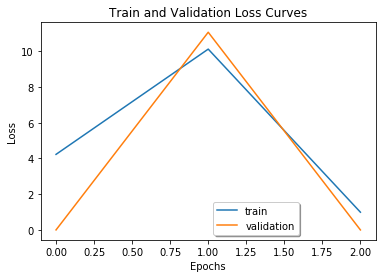

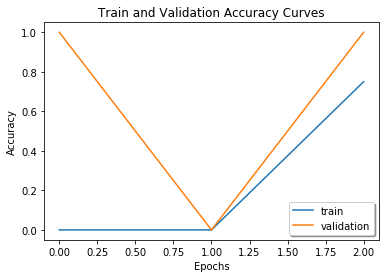

In [114]:
PlotAccLoss(BestResNet34_tl, 'ResNet34')

## ResNet18_TL

In [187]:
resNet18_tl = torchvision.models.resnet18(pretrained=True)
for param in resNet18_tl.parameters():
    param.requires_grad = False

fc_in_features = resNet18_tl.fc.in_features
resNet18_tl.fc = torch.nn.Linear(fc_in_features, 2)

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /Users/nhungle/.torch/models/resnet18-5c106cde.pth
46827520it [00:05, 7831596.62it/s]


In [189]:
resNet18_tl = resNet18_tl#.to(device)

# params (iterable) – iterable of parameters to optimize or dicts defining parameter groups
optimizer = torch.optim.Adam(resNet18_tl.fc.parameters(), lr = 0.01, weight_decay=1)

criterion = nn.CrossEntropyLoss()

scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min',patience=2)


BestResNet18_tl = train_model(resNet18_tl, 'resNet18_tl', criterion, optimizer, scheduler, num_epochs = 3, verbose = True)

Epoch 1/3
----------
train Loss: 3.2853 Acc: 0.2500
val Loss: 0.6765 Acc: 1.0000
Epoch 2/3
----------
train Loss: 1.1338 Acc: 0.7500
val Loss: 3.2416 Acc: 0.0000
Epoch 3/3
----------
train Loss: 1.5686 Acc: 0.5000
val Loss: 0.0628 Acc: 1.0000
Training time: 1minutes 40.980589866638184s
Best val Acc: 1.000000


## ResNet50_TL

In [10]:
resNet50_tl = torchvision.models.resnet50(pretrained=True)
for param in resNet50_tl.parameters():
    param.requires_grad = False

fc_in_features = resNet50_tl.fc.in_features
resNet50_tl.fc = torch.nn.Linear(fc_in_features, 2)

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /Users/nhungle/.torch/models/resnet50-19c8e357.pth
102502400it [00:08, 12519828.08it/s]


In [11]:
resNet50_tl = resNet50_tl#.to(device)

# params (iterable) – iterable of parameters to optimize or dicts defining parameter groups
optimizer = torch.optim.Adam(resNet50_tl.fc.parameters(), lr = 0.01, weight_decay=1)

criterion = nn.CrossEntropyLoss()

scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min',patience=2)


BestResNet50_tl = train_model(resNet50_tl, 'resNet50_tl', criterion, optimizer, scheduler, num_epochs = 3, verbose = True)

Epoch 1/3
----------
train Loss: 11.7420 Acc: 0.5000
val Loss: 5.3971 Acc: 0.0000
Epoch 2/3
----------
train Loss: 2.6619 Acc: 0.7500
val Loss: 0.0000 Acc: 1.0000
Epoch 3/3
----------
train Loss: 7.1961 Acc: 0.5000
val Loss: 0.9291 Acc: 0.0000
Training time: 5minutes 5.0708229541778564s
Best val Acc: 1.000000


## Evaluation on Test Set

In [2]:
def inference(model_ft,loader):
    model_ft.eval()
    whole_output =[]
    whole_target = []
    

    for valData in loader:
        data = valData['x']
        target = valData['y']
        if use_gpu:
            data = Variable(data,volatile=True).type(torch.FloatTensor).cuda()
            target = Variable(target,volatile=True).type(torch.LongTensor).cuda()
        else:
            data= Variable(data,volatile=True).type(torch.FloatTensor)
            target = Variable(target,volatile=True).type(torch.LongTensor)

        output =F.softmax(model_ft(data),dim=1)
        whole_output.append( output.cpu().data.numpy())
        whole_target.append( valData['y'].numpy())

    whole_output = np.concatenate(whole_output)
    whole_target = list(np.concatenate(whole_target))
    y_target = whole_target


    #print('Whole_output: {}, whole_target: {}'.format(whole_output, whole_target))
    #print('y_target: {}'.format(y_target))
    # Get the probability of being in class 1 
    y_score = [output[1] for output in whole_output]
    return y_score, y_target


In [60]:
def write_list_to_file(filename, my_list):
    with open(filename, 'w') as f:
        for item in my_list:
            f.write("%s\n" % item)

In [190]:
##### Inference Resnet34 #######
BestResNet34_tl = torch.load(os.path.join(graph_path, 'resNet34_tl.pt'))
y_score_resnet34_tl, y_target_resnet34_tl = inference(BestResNet34_tl, dataloaders['test'])
write_list_to_file(os.path.join(graph_path, 'y_score_resnet34_tl.txt'), y_score_resnet34_tl)
write_list_to_file(os.path.join(graph_path, 'y_target_resnet34_tl.txt'), y_target_resnet34_tl)

In [204]:
##### Inference Resnet18 #######
BestResNet18_tl = torch.load(os.path.join(graph_path, 'resNet18_tl.pt'))
y_score_resnet18_tl, y_target_resnet18_tl = inference(BestResNet18_tl, dataloaders['test'])
write_list_to_file(os.path.join(graph_path, 'y_score_resnet18_tl.txt'), y_score_resnet18_tl)
write_list_to_file(os.path.join(graph_path, 'y_target_resnet18_tl.txt'), y_target_resnet18_tl)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  from ipykernel import kernelapp as app


In [ ]:
def evaluate_model(model, dataloader, loss_fn, phase = 'test'):
    model.eval()
    running_correct = 0
    running_loss = 0
    running_total = 0
    outputs = np.array(0)
    preds = np.array(0)
    labels = np.array(0)
    for data in dataloader[phase]:
        inputs = data['x'].type(torch.FloatTensor).to(device)
        label = data['y'].to(device)
        output = model(inputs)
        loss = loss_fn(output, label)
        _, pred = torch.max(output, dim = 1)
        num_inputs = inputs.size()[0]
        outputs = np.append(outputs, output.cpu().detach().numpy())
        preds = np.append(preds, pred.cpu().detach().numpy())
        labels = np.append(labels, label.cpu().detach().numpy())
        running_correct += torch.sum(pred ==label).item()
        running_loss += loss.item()*num_inputs
        running_total += num_inputs
    accuracy = float(running_correct/running_total)
    loss = float(running_loss/running_total)
    
    return outputs[1:], preds[1:], labels[1:], accuracy, loss

In [ ]:
criterion = nn.CrossEntropyLoss()
outputs_TL, preds_TL, labels_TL, accuracy_TL, loss_TL = evaluate_model(BestResNet34_tl, dataloaders, criterion)